In [134]:
#Third Year Paper Code
import numpy as np
import random 
import matplotlib.pyplot as plt

In [122]:
# Simulation Setting
# Based on DO (1999) lab setting
# with u = 100
# start with production good in storage
# constant gain learning with gamma = 0.7

In [150]:
#Basic Parameters
u = 100
β = 0.9
c_1 = 1
c_2 = 4
c_3 = 9
t = 1
γ = 0.5

In [ ]:
#initial value for Q
#When initial condition is production good in storage
#based on rational expectation
shock = 0
Q_12 = 65 + shock
Q_13 = 103 + shock
Q_11 = Q_12 + u
Q_21 = 256 + shock
Q_23 = 244 + shock
Q_22 = Q_23 + u
Q_31 = 290 + shock
Q_32 = 230 + shock
Q_33 = Q_31 + u

In [230]:
# Create agents
# Agents have there type which same as there consumption type, they also have production type
class Agent:
    agentCount = 0

    def __init__(self, id, consume_type, product_type):
        self.id = id
        self.consume_type = consume_type
        self.product_type = product_type
        self.storage_type = product_type
        self.opposite_storage = 0
        self.trading_result = False
        self.trading = False
        self.original_storage = self.storage_type

        #generate type 1 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 1:
            self.Q_2 = 50 + random.randint(1,5)
        if self.consume_type == 1:
            self.Q_3 = 50 + random.randint(1,5)
        if self.consume_type == 1:
            self.Q_1 = 9999
            
        #generate type 2 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 2:
            self.Q_1 = 50 + random.randint(1,5)
        if self.consume_type == 2:
            self.Q_3 = 50 + random.randint(1,5)
        if self.consume_type == 2:
            self.Q_2 = 9999
            
        #generate type 3 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 3:
            self.Q_1 = 290 + random.randint(1,80)
        if self.consume_type == 3:
            self.Q_2 = 230 + random.randint(1,80)
        if self.consume_type == 3:
            self.Q_3 = 9999

        # other characteristics wait to be added
        Agent.agentCount += 1

    def displayAgent(self):
        print("Agent id:", self.id, "consume:", self.consume_type, ",produce:", self.product_type, ",storage:",
              self.storage_type, "Q_1:", self.Q_1, "Q_2:", self.Q_2, "Q_3:", self.Q_3,"opposite:",self.opposite_storage,"trading:",self.trading,"trading_reuslt:",self.trading_result)

        


In [97]:
# matching process
# update agent's information of what situation he is facing
def match(mylist):
    random.shuffle(mylist)
    matchlist = dict()
    index = list(range(0, len(mylist), 2))
    for i in index:
        matchlist[mylist[i]] = mylist[i + 1]
    for key in matchlist:
        update_opposite_storage(key,matchlist[key]) 
        key.original_storage = key.storage_type #easy to update Q at the end of the round
        matchlist[key].original_storage = matchlist[key].storage_type
    return matchlist

# update what good the other agent is holding
def update_opposite_storage(agent1, agent2):
    storage_1 = agent1.storage_type
    storage_2 = agent2.storage_type
    agent1.opposite_storage = storage_2
    agent2.opposite_storage = storage_1

In [100]:
#get the parameters for decision making and updating Q
def get_Q_hold(agent):
    if agent.storage_type == 1:
        return agent.Q_1
    elif agent.storage_type == 2:
        return agent.Q_2
    elif agent.storage_type == 3:
        return agent.Q_3

def get_original_Q_hold(agent):
    if agent.original_storage == 1:
        return agent.Q_1
    elif agent.original_storage == 2:
        return agent.Q_2
    elif agent.original_storage == 3:
        return agent.Q_3

def set_Q_hold(agent,update_value):
    if agent.storage_type == 1:
        agent.Q_1 = update_value
    elif agent.storage_type == 2:
        agent.Q_2 = update_value
    elif agent.storage_type == 3:
        agent.Q_3 = update_value
        
def set_original_Q_hold(agent,update_value):
    if agent.original_storage == 1:
        agent.Q_1 = update_value
    elif agent.original_storage == 2:
        agent.Q_2 = update_value
    elif agent.original_storage == 3:
        agent.Q_3 = update_value

def get_Q_trade(agent):
    if agent.opposite_storage == 1:
        return agent.Q_1
    elif agent.opposite_storage == 2:
        return agent.Q_2
    elif agent.opposite_storage == 3:
        return agent.Q_3

def get_C_hold(agent):
    if agent.storage_type == 1:
        return c_1
    elif agent.storage_type == 2:
        return c_2
    elif agent.storage_type == 3:
        return c_3

def get_C_trade(agent):
    if agent.opposite_storage == 1:
        return c_1
    elif agent.opposite_storage == 2:
        return c_2
    elif agent.opposite_storage == 3:
        return c_3


In [101]:
# trading decision by each agent
def transaction_decision(agent):
    Q_hold = get_Q_hold(agent)
    Q_trade = get_Q_trade(agent)
    C_hold = get_C_hold(agent)
    C_trade = get_C_trade(agent)

    if β * Q_hold - C_hold < β * Q_trade - C_trade:
        agent.trading = True
    else:
        agent.trading = False
        
# trading results 
def produce_outcome(matched_list):
    trade_outcome = list()
    for key in matched_list.keys():
        if key.trading == True and matched_list[key].trading == True:
            trade_outcome.append(True)
            key.trading_result = True
            matched_list[key].trading_result = True
        else:
            trade_outcome.append(False)
            key.trading_result = False
            matched_list[key].trading_result = False
    return trade_outcome



In [121]:
# based on trading result, updates Q and storage

def update_trading(agent):
    if(agent.trading_result == False): #if there is trade
        v_prime = get_C_hold(agent)*(-1) + β * get_Q_hold(agent)
        updated_value = get_Q_hold(agent) + γ * (v_prime - get_Q_hold(agent))
        set_Q_hold(agent,updated_value)
    else: #if trade happened 
        if agent.consume_type == agent.opposite_storage: #agent gets his own consumption good
            agent.storage_type = agent.product_type #agent eats the consumption good and produces another production good 
            v_prime = get_C_hold(agent) * (-1) + β * get_Q_hold(agent) + u
            updated_value = get_original_Q_hold(agent) + γ * (v_prime - get_original_Q_hold(agent))
            set_original_Q_hold(agent,updated_value)
        else: #agent does not get his cons good
            agent.storage_type = agent.opposite_storage 
            v_prime = get_C_hold(agent) *(-1) + β * get_Q_hold(agent)
            updated_value = get_original_Q_hold(agent) + γ * (v_prime - get_original_Q_hold(agent))
            set_original_Q_hold(agent, updated_value)

In [ ]:
# Global behavior recorder

def global_a1_s2_f3(mylist,count_down,count_up): #agent 1 holding 2 facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1 and ele.storage_type == 2 and ele.opposite_storage == 3):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s3_f1(mylist,count_down,count_up): #agent 2 holding 3 facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2 and ele.storage_type == 3 and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s1_f2(mylist,count_down,count_up): #agent 3 holding 1 facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3 and ele.storage_type == 1 and ele.opposite_storage == 2):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a1_s_f1(mylist,count_down,count_up): #agent 1 holding ANY good facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1  and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s_f2(mylist,count_down,count_up): #agent 2 holding ANY good facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2  and ele.opposite_storage ==2 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s_f3(mylist,count_down,count_up): #agent 3 holding ANY good facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3  and ele.opposite_storage ==3 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

In [231]:
# main code

if __name__ == '__main__':
    u = 100
    β = 0.9
    c_1 = 1
    c_2 = 4
    c_3 = 9
    t = 1

    mylist = list()
    agent1 = Agent(1, 1, 2)
    mylist.append(agent1)
    agent2 = Agent(2, 1, 2)
    mylist.append(agent2)
    agent3 = Agent(3, 1, 2)
    mylist.append(agent3)
    agent4 = Agent(4, 1, 2)
    mylist.append(agent4)
    agent5 = Agent(5, 1, 2)
    mylist.append(agent5)
    agent6 = Agent(6, 1, 2)
    mylist.append(agent6)
    agent7 = Agent(7, 1, 2)
    mylist.append(agent7)
    agent8 = Agent(8, 1, 2)
    mylist.append(agent8)
    agent9 = Agent(9, 2, 3)
    mylist.append(agent9)
    agent10 = Agent(10, 2, 3)
    mylist.append(agent10)
    agent11 = Agent(11, 2, 3)
    mylist.append(agent11)
    agent12 = Agent(12, 2, 3)
    mylist.append(agent12)
    agent13 = Agent(13, 2, 3)
    mylist.append(agent13)
    agent14 = Agent(14, 2, 3)
    mylist.append(agent14)
    agent15 = Agent(15, 2, 3)
    mylist.append(agent15)
    agent16 = Agent(16, 2, 3)
    mylist.append(agent16)
    agent17 = Agent(17, 3, 1)
    mylist.append(agent17)
    agent18 = Agent(18, 3, 1)
    mylist.append(agent18)
    agent19 = Agent(19, 3, 1)
    mylist.append(agent19)
    agent20 = Agent(20, 3, 1)
    mylist.append(agent20)
    agent21 = Agent(21, 3, 1)
    mylist.append(agent21)
    agent22 = Agent(22, 3, 1)
    mylist.append(agent22)
    agent23 = Agent(23, 3, 1)
    mylist.append(agent23)
    agent24 = Agent(24, 3, 1)
    mylist.append(agent24)

    game_continue = True

    count_round = 0
    sum_up123 = 0
    sum_down123 = 0
    sum_up231 = 0
    sum_down231 = 0
    sum_up312 = 0
    sum_down312 = 0
    
    result_list_123_each_round = []
    result_list_123_sum = []
    result_list_231_each_round = []
    result_list_231_sum = []
    result_list_312_each_round = []
    result_list_312_sum = []
    
    
    sum_up11 = 0
    sum_down11 = 0
    sum_up22 = 0
    sum_down22 = 0
    sum_up33 = 0
    sum_down33 = 0
    
    t_list = []
    
    while(count_round < 150):
        count_round += 1
        t_list.append(count_round)
        matched_list = match(mylist)

        for key in matched_list.keys():
            transaction_decision(key)
            transaction_decision(matched_list[key])

        global_r1_2_3 = global_a1_s2_f3(mylist,0,0)
        sum_up123 = sum_up123 + global_r1_2_3[0]
        sum_down123 = sum_down123 + global_r1_2_3[1]
        result_list_123_each_round.append( (global_r1_2_3[0]+0.1) / (global_r1_2_3[1]+0.1) )
        result_list_123_sum.append((sum_up123+0.1)/(sum_down123+0.1))
        
        global_r2_3_1 = global_a2_s3_f1(mylist,0,0)
        sum_up231 = sum_up231 + global_r2_3_1[0]
        sum_down231 = sum_down231 + global_r2_3_1[1]
        result_list_231_each_round.append( (global_r2_3_1[0]+0.1) / (global_r2_3_1[1]+0.1) )
        result_list_231_sum.append((sum_up231+0.1)/(sum_down231+0.1))
        
        global_r3_1_2 = global_a3_s1_f2(mylist,0,0)
        sum_up312 = sum_up312 + global_r3_1_2[0]
        sum_down312 = sum_down312 + global_r3_1_2[1]
        result_list_312_each_round.append( (global_r3_1_2[0]+0.1) / (global_r3_1_2[1]+0.1) )
        result_list_312_sum.append((sum_up312+0.1)/(sum_down312+0.1))
        
        global_r1_1 = global_a1_s_f1(mylist,0,0)
        sum_up11 = sum_up11 + global_r1_1[0]
        sum_down11 = sum_down11 + global_r1_1[1]
        
        global_r2_2 = global_a2_s_f2(mylist,0,0)
        sum_up22 = sum_up22 + global_r2_2[0]
        sum_down22 = sum_down22 + global_r2_2[1]
        
        global_r3_3 = global_a3_s_f3(mylist,0,0)
        sum_up33 = sum_up33 + global_r3_3[0]
        sum_down33 = sum_down33 + global_r3_3[1]
        
        

        for ele in mylist:
            ele.displayAgent()

        produce_outcome(matched_list)

        for key in matched_list.keys():
            update_trading(key)
            update_trading(matched_list[key])

        print(count_round)

        stopping_draw = random.uniform(0, 1)
        if stopping_draw > 0.01:
            game_continue = True
        else:
            game_continue = False

    print("Agent 1 with good 2 facing good 3:", sum_up123/sum_down123)
    print("Agent 2 with good 3 facing good 1:", sum_up231/sum_down231)
    print("Agent 3 with good 1 facing good 2:", sum_up312/sum_down312)
    
    print("Agent 1 facing good 1:", sum_up11/sum_down11)
    print("Agent 2 facing good 2:", sum_up22/sum_down22)
    print("Agent 3 facing good 3:", sum_up33/sum_down33)
    
    

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 348 Q_2: 279 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 53 Q_3: 51 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 52 Q_3: 55 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 51 Q_3: 51 opposite: 2 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 292 Q_2: 277 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 52 Q_3: 51 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 53 Q_2: 9999 Q_3: 53 opposite: 3 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 52 Q_2: 9999 Q_3: 53 opposite: 3 trading: False trading_reuslt: False
Agent id: 22 consu

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 269.37564375 Q_2: 254 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 342.4524937500001 Q_2: 253 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 379.105275 Q_2: 301 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 316.12965625000004 Q_2: 244 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 35.74908125 Q_3: 52 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 83.24908125000002 Q_3: 51 opposite: 2 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 288.367925 Q_2: 278 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 93.

Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 292.1839568289063 Q_2: 253 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 64.27400644453127 Q_3: 51 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 Q_1: 88.75856250000001 Q_2: 9999 Q_3: 90.36375000000001 opposite: 1 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 373.609135153125 Q_2: 301 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 37.889250000000004 Q_3: 30.889875000000004 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 85.13425000000001 Q_2: 9999 Q_3: 41.07625 opposite: 3 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 41.313893750000005 Q_2: 9999 Q_3: 41.97625000000001 opposite: 3 trading: False trading_re

Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 72.88414438691407 Q_3: 88.99386611718751 opposite: 1 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 52 Q_2: 9999 Q_3: 108.83226868022882 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 249.08496998618355 Q_2: 253 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 50.0865484375 Q_3: 83.30075 opposite: 3 trading: False trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 92.14786432773437 Q_3: 129.97994867968748 opposite: 3 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 190.96815015385675 Q_3: 51 opposite: 3 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 85.13425000000001 Q_2: 9999 Q_3: 22.38149984375 opposite: 2 trading: True trading_reuslt: Fal

Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 52 Q_2: 9999 Q_3: 130.47381635971118 opposite: 1 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 206.94748737851597 Q_2: 279 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 80.37753750000002 Q_2: 9999 Q_3: 46.191624925781255 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 92.14786432773437 Q_3: 143.73249078918946 opposite: 1 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 38.79261923176523 Q_3: 51 opposite: 3 trading: False trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 91.69375 Q_2: 9999 Q_3: 136.80732450194432 opposite: 3 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 134.74615504882811 Q_2: 9999 Q_3: 70.9203619140625 opposite: 1 trading: True trading_r

Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 175.50765843817044 Q_3: 71.2113390625 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 2 Q_1: 247.10844448255415 Q_2: 206.062338125 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 228.52188048403428 Q_2: 253 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 245.2399201268662 Q_2: 244 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 155.8912553524658 Q_2: 9999 Q_3: 86.31615319255371 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 100.65124996827149 Q_2: 9999 Q_3: 70.50956244786133 opposite: 3 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 52 Q_2: 9999 Q_3: 99.02873830140737 opposite: 1 trading: False trad

Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 72.13051677548161 Q_3: 137.4612934677856 opposite: 3 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 91.69375 Q_2: 9999 Q_3: 121.84922497573211 opposite: 2 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 2 Q_1: 247.10844448255415 Q_2: 170.9676971499219 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 60.80238683876952 Q_3: 84.85117148652344 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 179.42393280573026 Q_3: 143.73249078918946 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 84.86961544154678 Q_2: 9999 Q_3: 70.50956244786133 opposite: 2 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 52 Q_2: 9999 Q_3: 72.06851450116918 opposit

Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 9.816782877777529 Q_3: 61.5534186400833 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 284.2530222584264 Q_2: 190.90845616336225 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
23
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 269.5403711455051 Q_2: 190.90845616336225 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 185.07654021180636 Q_2: 9999 Q_3: 125.58948640957068 opposite: 1 trading: True trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 28.24952608600894 Q_2: 9999 Q_3: 31.867000535167485 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 107.19192900752992 Q_2: 9999 Q_3: 103.6550657006135 opposite: 3 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 60.80238683876952 Q

Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 28.24952608600894 Q_2: 9999 Q_3: 19.984967982988657 opposite: 2 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 193.88598585325678 Q_3: 51 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 103.29312191886217 Q_2: 9999 Q_3: 104.67215436191506 opposite: 2 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 234.38596125898033 Q_2: 261.84613165994125 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 177.38137139678963 Q_3: 71.2113390625 opposite: 2 trading: False trading_reuslt: False
26
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 234.38596125898033 Q_2: 246.7538250769442 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 101.58468058416538 Q_3: 153.084392

Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 198.67199043565222 Q_2: 9999 Q_3: 111.97970485404669 opposite: 3 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 244.75046634845535 Q_2: 244 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 170.11163856701563 Q_2: 9999 Q_3: 112.4022696428613 opposite: 1 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 174.37779709545325 Q_3: 87.43167865429436 opposite: 3 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 91.69375 Q_2: 9999 Q_3: 109.07973952822306 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 165.75843440998113 Q_3: 143.73249078918946 opposite: 3 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 101.58468058416538 Q_3: 118.41448110448883

Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 Q_1: 181.69213092926037 Q_2: 9999 Q_3: 110.29663460658007 opposite: 1 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 226.9102045583556 Q_2: 216.13475693843145 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 110.53440367965644 Q_3: 142.760140861275 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 240.3645970312316 Q_2: 244 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 178.32647136817613 Q_2: 9999 Q_3: 139.84275550171566 opposite: 3 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 171.30780173896397 Q_2: 9999 Q_3: 166.9723037199025 opposite: 1 trading: True trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 175.0915308171447 Q_3: 143.732490789

Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 186.47720513911474 Q_3: 87.43167865429436 opposite: 3 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 91.69375 Q_2: 9999 Q_3: 125.88761353372794 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 89.62539680320971 Q_3: 99.51221695541678 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 183.90435156426452 Q_2: 219.56864879826156 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 179.47836938293165 Q_2: 9999 Q_3: 130.10395545430464 opposite: 1 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 225.83359230155915 Q_2: 216.13475693843145 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 221.95208206966464 Q_2: 202.6304116543

Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 251.4755080584161 Q_2: 190.90845616336225 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 423.3065873090107 Q_2: 364.2473720447391 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 130.10843321435632 Q_2: 9999 Q_3: 87.40171480886588 opposite: 1 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 154.2506819049856 Q_3: 169.12055208648292 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 119.38750299437869 Q_3: 177.3655889182478 opposite: 2 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 Q_1: 215.13569407752584 Q_2: 9999 Q_3: 173.86681637616667 opposite: 1 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 237.3228261995493 Q_2: 216.1347

Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 131.02357893554137 Q_3: 163.99730947233542 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 200.63194446872802 Q_2: 9999 Q_3: 149.16736592961928 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 Q_1: 193.18496390496708 Q_2: 9999 Q_3: 183.24447052296995 opposite: 3 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 259.3075637215845 Q_2: 190.90845616336225 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 175.35946377111912 Q_3: 71.2113390625 opposite: 1 trading: True trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 160.50609454299496 Q_2: 202.63041165438045 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 406.63123529406306 Q_2: 364.2

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 209.47023688627385 Q_2: 219.56864879826156 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 319.3752624509438 Q_3: 51 opposite: 3 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 Q_1: 219.47286959019584 Q_2: 9999 Q_3: 156.60313464698038 opposite: 2 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 220.59355432634663 Q_2: 229.8 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 129.2976295926038 Q_3: 61.5534186400833 opposite: 2 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 212.97135134932586 Q_2: 9999 Q_3: 174.9073563269219 opposite: 1 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 180.09532988302703 Q_2: 9999 Q_3: 158.38887382749678 oppos

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 97.1734422687095 Q_3: 138.08753703915275 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 273.3202072285213 Q_2: 259.8979362012176 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 105.1515551719587 Q_3: 61.5534186400833 opposite: 3 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 174.1290405977908 Q_2: 9999 Q_3: 135.08720823716038 opposite: 2 trading: True trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 152.98298345846032 Q_2: 9999 Q_3: 158.38887382749678 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 261.88156274192653 Q_2: 190.90845616336225 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
51
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 170.53135109424488

Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 132.4964828656215 Q_3: 71.2113390625 opposite: 2 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 214.59149676820658 Q_3: 87.43167865429436 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 166.02752872281545 Q_3: 223.2958734286549 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 233.53679864084913 Q_2: 279.84873411181013 Q_3: 9999 opposite: 2 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 293.3404497588033 Q_2: 216.13475693843145 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 334.4866417171273 Q_2: 351.65617367896715 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 207.08536236382304 Q_2: 9999 Q_3: 1

Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 Q_1: 208.0338606233621 Q_2: 9999 Q_3: 227.43265140316845 opposite: 2 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 100.49946339706662 Q_3: 71.2113390625 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 149.12534901746636 Q_3: 205.3365811510388 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 139.1919103651422 Q_2: 9999 Q_3: 92.5886468720692 opposite: 2 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 334.4866417171273 Q_2: 279.0064013126042 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 155.47380098847648 Q_2: 9999 Q_3: 198.5743250292922 opposite: 2 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 237.07269220635635 Q_2: 216.13475693843

Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 155.47380098847648 Q_2: 9999 Q_3: 187.91434132588995 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 273.5889256579494 Q_2: 233.28898255971143 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 332.8542344422221 Q_2: 339.5221894290094 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 121.937691058557 Q_3: 71.2113390625 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 188.15709576837295 Q_2: 157.84096066466444 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 164.43332672522365 Q_3: 52 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 207.08536236382304 Q_2: 9999 Q_3: 65.379912834504 

Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 189.49014843934043 Q_2: 9999 Q_3: 134.84123720203021 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 239.36500106679094 Q_2: 215.08926563237915 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 243.02055230012152 Q_2: 9999 Q_3: 181.294722100433 opposite: 1 trading: True trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 169.4689550902204 Q_2: 9999 Q_3: 122.42722171224159 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 164.23912314849014 Q_3: 230.10447404619993 opposite: 3 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 186.86706926225662 Q_3: 128.78619312749663 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 155.47380098847648 Q_2: 9999 Q

Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 155.47380098847648 Q_2: 9999 Q_3: 155.01789109705004 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 Q_1: 209.4340313135753 Q_2: 9999 Q_3: 184.40588817459786 opposite: 3 trading: False trading_reuslt: False
69
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 161.0378660181795 Q_2: 9999 Q_3: 152.1911853987183 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 214.74753000918662 Q_3: 191.0136229035764 opposite: 1 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 244.45349853880185 Q_2: 9999 Q_3: 199.50660958527118 opposite: 2 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 307.0923722307705 Q_3: 51 opposite: 3 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 316.75978604610384 Q_2: 233.28898255971143 Q

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 318.9712952135355 Q_2: 185.3161237358853 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 273.5391635416264 Q_3: 191.0136229035764 opposite: 1 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 200.20587584056807 Q_2: 9999 Q_3: 134.64192017305038 opposite: 1 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 210.7912430650287 Q_2: 216.13475693843145 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 355.08832264135685 Q_3: 51 opposite: 3 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 186.61791941639916 Q_2: 9999 Q_3: 129.30437328011755 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 117.31864912646739 Q_3: 52 opposite: 2 

Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 Q_1: 135.5770196935498 Q_2: 9999 Q_3: 184.40588817459786 opposite: 2 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 186.61791941639916 Q_2: 9999 Q_3: 132.4911072579 opposite: 2 trading: True trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 138.13702295506474 Q_3: 52 opposite: 1 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 94.44959382712433 Q_3: 125.77774113639455 opposite: 1 trading: True trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 172.55044988243696 Q_2: 208.17273594037795 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 204.90335682608867 Q_2: 9999 Q_3: 175.25312902501136 opposite: 2 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 171.59617616145462 Q_3: 71.2113390625 oppo

Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 157.85523005609863 Q_3: 52 opposite: 3 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 271.3422887322572 Q_2: 9999 Q_3: 227.95625299019443 opposite: 2 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 184.66319121535864 Q_2: 150.75241038624694 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 278.0023738502514 Q_2: 199.49629842115775 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 226.81558647429944 Q_2: 9999 Q_3: 149.39094894507275 opposite: 3 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 196.11513436265 Q_2: 9999 Q_3: 125.81893287447218 opposite: 3 trading: False trading_reuslt: False
80
Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 Q_1: 185.95760154907674 Q_2: 9999 Q_3: 173.

Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 283.6061069110648 Q_2: 9999 Q_3: 227.63325009985812 opposite: 3 trading: False trading_reuslt: True
83
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 234.72627437575562 Q_3: 51 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 213.8734976050155 Q_2: 185.3161237358853 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 193.48058852993253 Q_2: 208.17273594037795 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 196.0377854044663 Q_3: 61.5534186400833 opposite: 2 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 226.81558647429944 Q_2: 9999 Q_3: 154.98542410919268 opposite: 2 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 195.02253426168517 Q_2: 147.5140505518484 Q_3

Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 252.84622679374792 Q_2: 9999 Q_3: 282.12454559360475 opposite: 1 trading: False trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 181.94354000910016 Q_2: 185.3161237358853 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
87
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 226.81558647429944 Q_2: 9999 Q_3: 152.41090909583812 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 172.34636300864514 Q_2: 185.3161237358853 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 110.29277148790041 Q_3: 71.2113390625 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 180.44554210834974 Q_2: 240.71962910869115 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 315.5797440869003 Q_2: 372.4

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 278.7659629884748 Q_3: 51 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 251.1566889941722 Q_3: 191.0136229035764 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 133.98226495443862 Q_3: 71.2113390625 opposite: 3 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 204.8282960070918 Q_2: 9999 Q_3: 145.6262936034172 opposite: 2 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 288.7576919534255 Q_2: 9999 Q_3: 209.80861727338788 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 125.4275467991091 Q_2: 9999 Q_3: 26.650263533192373 opposite: 3 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 315.27077023412954 Q_2: 351.8652715626873 Q_3: 99

Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 125.4275467991091 Q_2: 9999 Q_3: 5.012368711932271 opposite: 3 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 197.14894291505948 Q_3: 191.0136229035764 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 239.94960915798538 Q_2: 9999 Q_3: 204.19667465950022 opposite: 2 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 238.91845456915553 Q_2: 192.229779218182 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 300.0071659423587 Q_2: 9999 Q_3: 244.72959992365776 opposite: 1 trading: True trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 184.9739788138334 Q_3: 52 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 244.8191731272367 Q_2: 185.3161237358853 Q_3: 99

Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 Q_1: 194.08688120673722 Q_2: 9999 Q_3: 160.39680038524253 opposite: 2 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 325.2311606800919 Q_3: 51 opposite: 1 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 182.58464397597913 Q_3: 163.2872874864829 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 77.98283271829692 Q_3: 87.43167865429436 opposite: 2 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 183.60836621157813 Q_2: 9999 Q_3: 178.0516065695167 opposite: 2 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 200.7947652090528 Q_2: 193.43742100719027 Q_3: 9999 opposite: 1 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 179.7519898097323 Q_2: 177.5221645939721 Q_3: 99

Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 191.29396303807363 Q_2: 215.8617808814354 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 300.3518130686891 Q_3: 51 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 256.6387792295196 Q_2: 185.3161237358853 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 217.42740606207158 Q_2: 9999 Q_3: 139.82074618253938 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 175.36155738863502 Q_2: 150.75241038624694 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 189.04093624603476 Q_3: 193.22098528278246 opposite: 2 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 117.10772005630506 Q_3: 52 opposite:

Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 162.99020478683337 Q_2: 177.5221645939721 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 Q_1: 163.88560043789215 Q_2: 9999 Q_3: 176.32330054214876 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 271.10575231388816 Q_2: 285.2022822297625 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 144.70023148327454 Q_3: 52 opposite: 3 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 254.00109425958323 Q_2: 9999 Q_3: 198.02430430129027 opposite: 2 trading: True trading_reuslt: False
105
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 171.24388809411863 Q_3: 214.58971765167504 opposite: 3 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 278.35344607684135 Q_2: 9999 Q_3: 257.

Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 152.44114545196572 Q_2: 9999 Q_3: 197.85677873928927 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 320.05302920696215 Q_2: 192.229779218182 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 274.36330540916776 Q_2: 9999 Q_3: 203.55204931218518 opposite: 2 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 162.99020478683337 Q_2: 137.17316257531894 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 277.94674465641117 Q_2: 199.49629842115775 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 196.92479581775586 Q_2: 150.75241038624694 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 254.00109425958323 Q_2:

Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 260.1451401387094 Q_2: 9999 Q_3: 234.17884968624907 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 170.52765722982372 Q_3: 52 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 303.95525512050324 Q_2: 192.229779218182 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 158.54153947353598 Q_2: 150.75241038624694 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 161.86978472900375 Q_2: 186.57635484766888 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 Q_1: 246.53067326744502 Q_2: 9999 Q_3: 266.7600632211959 opposite: 2 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 217.2924131516039 Q_2: 292.80248119844106 Q

Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 165.89444440613215 Q_3: 119.1787927818204 opposite: 3 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 233.12615011742014 Q_3: 52 opposite: 3 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 255.05526844966573 Q_2: 9999 Q_3: 191.5851703164651 opposite: 2 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 242.6124807179259 Q_2: 215.62958055188614 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 260.2737910799557 Q_3: 61.5534186400833 opposite: 1 trading: True trading_reuslt: True
116
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 206.4569828540428 Q_3: 51 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 191.6513373636643 Q_2: 9999 Q_3: 147.8092404650221 opposite:

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 171.30605567448495 Q_3: 51 opposite: 2 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 185.5610213513649 Q_2: 199.49629842115775 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 268.6498907293293 Q_2: 9999 Q_3: 225.05516847484813 opposite: 1 trading: True trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 232.23820233042719 Q_2: 150.75241038624694 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 Q_1: 246.53067326744502 Q_2: 9999 Q_3: 195.89345243537528 opposite: 3 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 198.30981772701267 Q_2: 9999 Q_3: 152.21060636118204 opposite: 3 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 228.80759692505876 Q_2: 185.316123735885

Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 280.17327978689747 Q_2: 150.75241038624694 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 303.73782847177546 Q_2: 9999 Q_3: 257.49985621574604 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 277.6727138759614 Q_2: 9999 Q_3: 216.77403331234115 opposite: 2 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 180.18864360793816 Q_3: 119.1787927818204 opposite: 3 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 241.40092061760123 Q_2: 244.92370170361954 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 227.37903024294116 Q_2: 185.3161237358853 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 181.70491052110788 Q_2: 9

Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 210.90241861975375 Q_2: 9999 Q_3: 123.30585983690014 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 207.9657363878187 Q_2: 9999 Q_3: 161.06696114779567 opposite: 3 trading: False trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 203.9815669401199 Q_3: 210.5368875085863 opposite: 2 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 153.818389262361 Q_2: 171.07516427066165 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 273.1483901957774 Q_2: 9999 Q_3: 264.93195092017197 opposite: 2 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 237.55277663192894 Q_2: 246.9499249338399 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 95.71706474961431 Q

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 225.1751378003325 Q_2: 222.69996382794199 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 261.9061917874673 Q_2: 9999 Q_3: 226.45565044397156 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 299.98915013601265 Q_2: 185.3161237358853 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 241.9930717224076 Q_2: 150.75241038624694 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 276.3106891787502 Q_2: 9999 Q_3: 204.38740497948766 opposite: 1 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 288.0108636948447 Q_2: 215.62958055188614 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 173.86041838970058 Q

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 261.89929570654994 Q_3: 51 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 217.67152804165804 Q_2: 210.27364365199094 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 238.11868187459925 Q_2: 150.75241038624694 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 Q_1: 225.57979867522772 Q_2: 9999 Q_3: 186.38214758059237 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 199.33776465497394 Q_2: 209.56496563654488 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 223.12557118377978 Q_2: 9999 Q_3: 230.5856115263461 opposite: 2 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 235.34609630928077 Q_2: 134.6792954271

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 289.87630795911156 Q_2: 9999 Q_3: 248.6306045341877 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 234.96092885701114 Q_2: 134.67929542717775 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 280.570000482851 Q_2: 185.3161237358853 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 199.33776465497394 Q_2: 226.1873753010546 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 160.25842913017445 Q_3: 52 opposite: 3 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 244.20154348370235 Q_2: 9999 Q_3: 230.5856115263461 opposite: 2 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 256.7927518206298 Q_2: 9999 Q_3: 225.272848028819

Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 101.40274050702814 Q_3: 143.02316347095913 opposite: 2 trading: False trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 250.08302451970644 Q_2: 9999 Q_3: 212.09893847479486 opposite: 2 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 175.87194799070858 Q_3: 61.5534186400833 opposite: 3 trading: False trading_reuslt: False
141
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 207.6065388030898 Q_2: 249.99257834399154 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 329.890957559841 Q_2: 134.67929542717775 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 Q_1: 243.2432183645431 Q_2: 9999 Q_3: 199.07352751722004 opposite: 3 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 Q_1: 250.08302451970644 Q_2: 9

Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 231.21283083738058 Q_2: 215.62958055188614 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 224.22994984828597 Q_2: 207.27367560567473 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 180.03785980243856 Q_2: 9999 Q_3: 154.10255870216017 opposite: 1 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 203.00180989660828 Q_2: 9999 Q_3: 118.65684862240188 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 298.32361846856196 Q_2: 9999 Q_3: 221.15085169324888 opposite: 3 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 100.47801088303824 Q_3: 143.02316347095913 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 235.78461846315383 Q_2

Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 139.96845537045596 Q_3: 61.5534186400833 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 253.7942010870163 Q_2: 181.73931346593707 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 129.54569452455547 Q_3: 196.22326217886834 opposite: 1 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 Q_1: 251.4987273651574 Q_2: 9999 Q_3: 206.42714405853962 opposite: 3 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 191.31300644003 Q_2: 9999 Q_3: 154.10255870216017 opposite: 3 trading: False trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 278.1868578921043 Q_2: 185.3161237358853 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 272.2159427905501 Q_3: 52

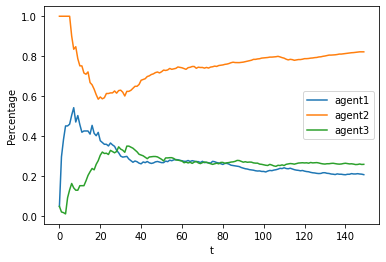

In [232]:
#plot the dynamic of the behavior

#plt.plot(result_list_123_each_round)
plt.plot(result_list_123_sum, label = "agent1")
#plt.plot(result_list_123_each_round)
plt.plot(result_list_231_sum, label = "agent2")
#plt.plot(result_list_123_each_round)
plt.plot(result_list_312_sum, label = "agent3")
plt.legend()
plt.xlabel("t")
plt.ylabel("Percentage")
plt.show()

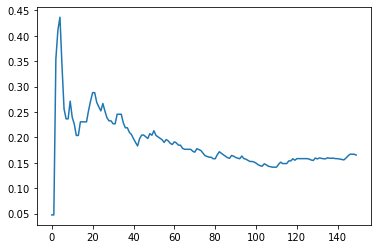

In [217]:
#plt the best responds of the behavior